# imports

In [6]:
import glob
import pickle
import pandas as pd
from sklearn.cross_decomposition import CCA
import numpy as np


# First, I load the data…


In [9]:

file_paths = glob.glob("three_feature_folder/*.p")
#print(file_paths)
contents = []

for f in file_paths:
    contents.append(pickle.load(open(f,'rb')))
print(contents)
print(contents[0]['dm'].columns)
print(contents[0]['efel'].columns)
print(contents[0]['allen'].columns)




['three_feature_folder/NMLCL001142.p', 'three_feature_folder/NMLCL000973.p', 'three_feature_folder/NMLCL001474.p', 'three_feature_folder/NMLCL000341.p', 'three_feature_folder/NMLCL000777.p', 'three_feature_folder/NMLCL000133.p', 'three_feature_folder/NMLCL001069.p', 'three_feature_folder/NMLCL000541.p', 'three_feature_folder/NMLCL000605.p', 'three_feature_folder/NMLCL001438.p', 'three_feature_folder/NMLCL000501.p', 'three_feature_folder/NMLCL000373.p', 'three_feature_folder/NMLCL000309.p', 'three_feature_folder/NMLCL000637.p', 'three_feature_folder/NMLCL000405.p', 'three_feature_folder/NMLCL001519.p', 'three_feature_folder/NMLCL000937.p', 'three_feature_folder/NMLCL001503.p', 'three_feature_folder/NMLCL001464.p', 'three_feature_folder/NMLCL001138.p', 'three_feature_folder/NMLCL000229.p', 'three_feature_folder/NMLCL001139.p', 'three_feature_folder/NMLCL000101.p', 'three_feature_folder/NMLCL001101.p', 'three_feature_folder/NMLCL001037.p', 'three_feature_folder/NMLCL000701.p', 'three_feat

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




### Then, I do a cleanup step…
### fix fact that column names may be NU classes as opposed to strings.


In [11]:

rename = {}

def clean_data_formating(contents):
    for col in contents[0]['dm'].columns:
        if hasattr(col,'name'):
            rename[col] = col.name
        else:
            rename[col] = col
    for cont in contents:
        cont['dm'].rename(columns=rename, inplace=True)
        #print(cont['dm'].columns)
    return contents
contents = clean_data_formating(contents)

# Now I try to align and merge the data frames

This is much like merging and aligning the excell spreadsheets.

I try to find features that should be the same across feature space like Coefficient of variation.

In [14]:
CV_DM = contents[0]['dm']['ISICVTest'].iloc[0]
accom_DM = contents[0]['dm']['InitialAccommodationMeanTest'].iloc[0]
inrh = contents[0]['dm']['InputResistanceTest'].iloc[0]
delay = contents[0]['dm']['AP1DelayMeanTest'].iloc[0]

# Allen
ALLEN_CV15 = contents[0]['allen']['isi_cv'][0]#.iloc[0]
ALLEN_CV30 = contents[0]['allen']['isi_cv'][1]#.iloc[1]


ahp = contents[0]['efel']['AHP_depth']
spwidth = contents[0]['efel']['spike_half_width']


adaptation_index_EFEL = contents[0]['efel']['adaptation_index']
daptation_index2_EFEL = contents[0]['efel']['adaptation_index2']
sag_amplitude_EFEL = contents[0]['efel']['sag_amplitude']
irregularity_index_EFEL = contents[0]['efel']['irregularity_index']
time_to_first_spike_EFEL = contents[0]['efel']['time_to_first_spike']

EFEL_ISI_CV_15 = contents[0]['efel']['ISI_CV'].iloc[0]
EFEL_ISI_CV_30 = contents[0]['efel']['ISI_CV'].iloc[1]

#aligned_f = pd.DataFrame(columns=['protocol','EFEL','DM','ALLEN'])
aligned_frame = []
#aligned_f = pd.DataFrame()
temp = {'protocol':1.5,'EFEL':float(EFEL_ISI_CV_15[0]),'DM':CV_DM,'ALLEN':ALLEN_CV15[0]}
#aligned_f.append(temp,ignore_index=True)#'cv1.5')

aligned_frame.append(temp)

temp = {'protocol':3.0,'ALLEN':ALLEN_CV30.iloc[-1],'DM':CV_DM,'EFEL':float(EFEL_ISI_CV_30[0])}
aligned_frame.append(temp)

#aligned_f.append(temp,ignore_index=True)#index='cv3.0')
#print(aligned_f)

#import pdb
#pdb.set_trace()
temp = {'protocol':3.0,'EFEL':adaptation_index_EFEL.iloc[-1],'DM':accom_DM,'ALLEN':contents[0]['allen']['adapt'].iloc[-1]}
#aligned_f = aligned_frame.append(temp)

temp = {'protocol':1.5,'EFEL':adaptation_index_EFEL.iloc[0],'DM':accom_DM,'ALLEN':contents[0]['allen']['adapt'].iloc[0]}
aligned_frame.append(temp)


temp = {'protocol':3.0,'EFEL':time_to_first_spike_EFEL.iloc[-1],'DM':delay,'ALLEN':contents[0]['allen']['latency'].iloc[-1]}
aligned_frame.append(temp)
temp = {'protocol':1.5,'EFEL':time_to_first_spike_EFEL.iloc[0],'DM':delay,'ALLEN':contents[0]['allen']['latency'].iloc[0]}
aligned_frame.append(temp)

af = pd.DataFrame(aligned_frame)
af.rename(index={1:'CV3'}, inplace=True)
af.rename(index={0:'CV15'}, inplace=True)
af.rename(index={3:'adaption15'}, inplace=True)
af.rename(index={2:'adaption3'}, inplace=True)
af.rename(index={2:'delay3'}, inplace=True)
af.rename(index={2:'delay15'}, inplace=True)

#print(af['ALLEN'].corr(af['DM']))

#print(af.corr())
print(af)


                                                        ALLEN  \
CV15        0    0.048026
0    0.182765
Name: isi_cv, dtyp...   
CV3                                                  0.182765   
adaption3                                        -0.000207387   
adaption15                                            1.00174   
4                                                     0.99995   

                              DM                   EFEL  protocol  
CV15                     5.47136               0.184659       1.5  
CV3                      5.47136              0.0449844       3.0  
adaption3               -29.1667  [0.00765320288822377]       1.5  
adaption15  1.759999999999991 ms   [0.7921875001590024]       3.0  
4           1.759999999999991 ms   [2.1921875001593207]       1.5  


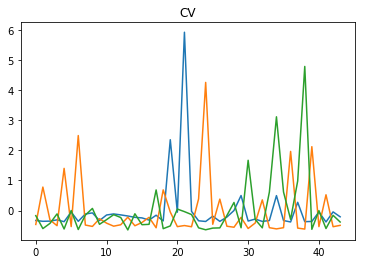

In [17]:
import matplotlib.pyplot as plt

def plot_three_vectors(three_vectors,title=None):
    plot_vector = [i for i,_ in enumerate(three_vectors[0])]
    for tv in three_vectors:
        tv = (tv - np.mean(tv))/np.std(tv)
        plt.plot(plot_vector,tv)
        plt.title(title)
    plt.show()
    return

efel_CV = [ float(cont['efel']['ISI_CV'].iloc[0]) for cont in contents ]
dm_CV = [ float(cont['dm']['ISICVTest'].iloc[0]) for cont in contents ]
allen_CV = [ float(cont['allen']['isi_cv'].iloc[0]) for cont in contents ]

scaled_allen_CV = (allen_CV - np.mean(allen_CV))/np.std(allen_CV)
scaled_dm_CV = (dm_CV - np.mean(dm_CV))/np.std(dm_CV)
#sklearn.preprocessing.scale(, axis=0, with_mean=True, with_std=True, copy=True)
scaled_efel_CV = (efel_CV - np.mean(efel_CV))/np.std(efel_CV)
three_vectors = [scaled_allen_CV, scaled_dm_CV,scaled_efel_CV]
plot_three_vectors(three_vectors,title='CV')

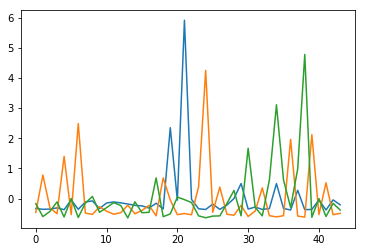

'\n\ncca = CCA(n_components=1)\ncca.fit(U, V)\n\ncca.coef_.shape                   # (5,5)\n\nU_c, V_c = cca.transform(U, V)\nU_c.shape                         # (100,1)\nV_c.shape                         # (100,1)\n'

In [16]:



#sklearn.preprocessing.scale(efel_CV, axis=0, with_mean=True, with_std=True, copy=True)

plt.show()
X = list(zip(efel_CV, dm_CV))
Y = list(zip(dm_CV,allen_CV))
cca.fit(X,Y)

cca.coef_.shape                   # (5,5)

U_c, V_c = cca.transform(X, Y)

U_c.shape                         # (100,1)
V_c.shape                         # (100,1)
##
# wrong because needs different trace
##
inrh = contents[0]['efel']['ohmic_input_resistance']
##
# DM
CV_DM = contents[0]['dm']['ISICVTest'].iloc[0]
accom_DM = contents[0]['dm']['InitialAccommodationMeanTest'].iloc[0]
inrh = contents[0]['dm']['InputResistanceTest'].iloc[0]
delay = contents[0]['dm']['AP1DelayMeanTest'].iloc[0]

# Allen
ALLEN_CV15 = contents[0]['allen']['isi_cv'][0]#.iloc[0]
ALLEN_CV30 = contents[0]['allen']['isi_cv'][1]#.iloc[1]


'''

cca = CCA(n_components=1)
cca.fit(U, V)

cca.coef_.shape                   # (5,5)

U_c, V_c = cca.transform(U, V)
U_c.shape                         # (100,1)
V_c.shape                         # (100,1)
'''

In [11]:
ALLEN_CV30

1    0.048026
1    0.182765
Name: isi_cv, dtype: float64